In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open("output/baseline3_100.jsonl") as f:
    lines = f.readlines()
    baseline_outputs = [json.loads(line) for line in lines]

with open("output/summarization_with_corresponding_in_context.jsonl") as f:
    lines = f.readlines()
    summarization_outputs = [json.loads(line) for line in lines]

with open("output/question_generation_with_corresponding_in_context.jsonl") as f:
    lines = f.readlines()
    question_generation_outputs = [json.loads(line) for line in lines]

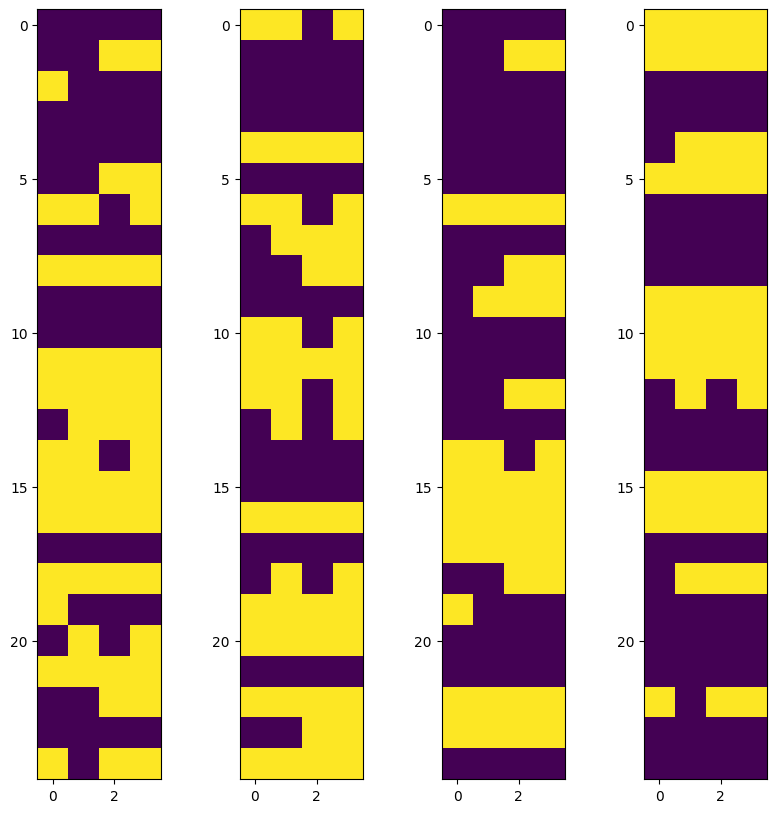

In [21]:
correct_mat = np.array(
    [
        [output["correct"] for output in baseline_outputs],
        [output["correct"] for output in summarization_outputs],
        [output["correct"] for output in question_generation_outputs],
        [summarization_outputs[i]["correct"] or question_generation_outputs[i]["correct"] for i in range(100)],
    ]
).T

correct_mat_chunks = np.array_split(correct_mat, 4)
# Create side by side imshow for each chunk
fig, axs = plt.subplots(1, 4, figsize=(10, 10))
for i, chunk in enumerate(correct_mat_chunks):
    axs[i].imshow(chunk, cmap="viridis")

In [11]:
incorrect_baseline_indices = [i for i, output in enumerate(baseline_outputs) if output["correct"] == False]
correct_summarization_indices = [i for i, output in enumerate(summarization_outputs) if output["correct"] == True]
correct_question_generation_indices = [i for i, output in enumerate(question_generation_outputs) if output["correct"] == True]

summarization_advantage_indices = set(correct_summarization_indices) & set(incorrect_baseline_indices)
question_generation_advantage_indices = set(correct_question_generation_indices) & set(incorrect_baseline_indices)

In [16]:
question_generation_advantage_indices

{1, 5, 13, 22, 32, 33, 48, 51, 58, 59, 62, 68, 79, 93}

In [19]:
question_generation_outputs[5]

{'question': "All of historians speak highly of Picardo's work, is this true? Why?",
 'ground_truth': 'False, because some people believe that Parrado destroyed the part of historical and architectural.',
 'generated_answer': 'No, because his approach to restoration, prioritizing aesthetics and tourism over historical accuracy and archaeological research, has been a matter of significant controversy and regret among historians and archaeologists.',
 'additional_info': {'top_chunks_info': [{'summary_score': 0.8918934984771567,
    'generated_question_rank': 0,
    'text_score': 0.8131839761491482,
    'text_rank': 5,
    'generated_question': "How do contemporary archaeologists and historians view Picardo's work, and what specific issues are they concerned about?",
    'text': 'In 1975 he also developed improvements for one of the earliest existing Paradores, opened in 1929, the castle at Ciudad Rodrigo in the Province of Salamanca in Castilla y León. Controversial legacy of Picardo\'s 

In [20]:
baseline_outputs[5]

{'question': "All of historians speak highly of Picardo's work, is this true? Why?",
 'ground_truth': 'False, because some people believe that Parrado destroyed the part of historical and architectural.',
 'generated_answer': 'Yes, because his architectural drawings were described as "magnificent" by Luis Menéndez-Pidal y Álvarez, his work for Paradores de Turismo is highly regarded by professionals and hotel guests alike, and his contributions to historical preservation and restoration were aligned with the influential "Manifiesto de la Alhambra," earning respect from peers and historians.',
 'additional_info': {'raw_text_chunk_count': 2,
  'summary_chunk_count': 0,
  'top_chunks_text': ['Picardo was regarded as an "outstanding" muralist.At the same time his drawings of buildings and architectural details were published as illustrations in a best-selling textbook on monumental and historic Spanish architecture, Arquitectura Popular Española, by the restoration and conservation archite